In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn plotly

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
file_path = '/content/COVID- 19 clinical trials .csv'  # Adjust if needed
df = pd.read_csv(file_path)

# Preview the data
df.head()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [ ]:
# Check for missing values
df.isnull().sum()

# Drop columns with too many missing values or fill them if appropriate
df_cleaned = df.dropna(axis=1, thresh=len(df)*0.5)  # Drop columns with >50% missing
df_cleaned.fillna('Unknown', inplace=True)

# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Check data types
df_cleaned.dtypes


/tmp/ipython-input-19-1384168553.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned.fillna('Unknown', inplace=True)
/tmp/ipython-input-19-1384168553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.fillna('Unknown', inplace=True)


,0
rank,int64
nct_number,object
title,object
status,object
study_results,object
conditions,object
interventions,object
outcome_measures,object
sponsor/collaborators,object
gender,object


['rank', 'nct_number', 'title', 'status', 'study_results', 'conditions', 'interventions', 'outcome_measures', 'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment', 'funded_bys', 'study_type', 'study_designs', 'other_ids', 'start_date', 'primary_completion_date', 'completion_date', 'first_posted', 'last_update_posted', 'locations', 'url']


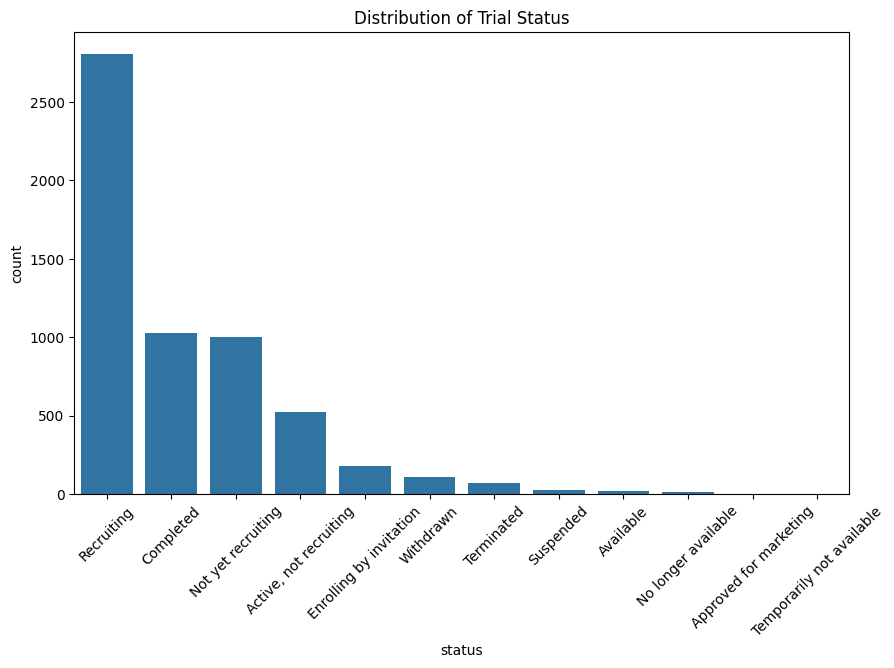

In [ ]:
print(df_cleaned.columns.tolist())
for col in possible_status_cols:
    if col in df_cleaned.columns:
        status_col = col
        break

if status_col:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df_cleaned, x=status_col, order=df_cleaned[status_col].value_counts().index)
    plt.title('Distribution of Trial Status')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No suitable status column found in the dataset.")


In [ ]:
study_designs = df_cleaned['study_type'].value_counts()
px.pie(names=study_designs.index, values=study_designs.values, title='Study Design Distribution')


In [ ]:
if 'location_country' in df_cleaned.columns:
    country_counts = df_cleaned['location_country'].value_counts().head(10)
    sns.barplot(x=country_counts.values, y=country_counts.index)
    plt.title('Top 10 Countries by Number of Trials')
    plt.xlabel('Number of Trials')
    plt.show()


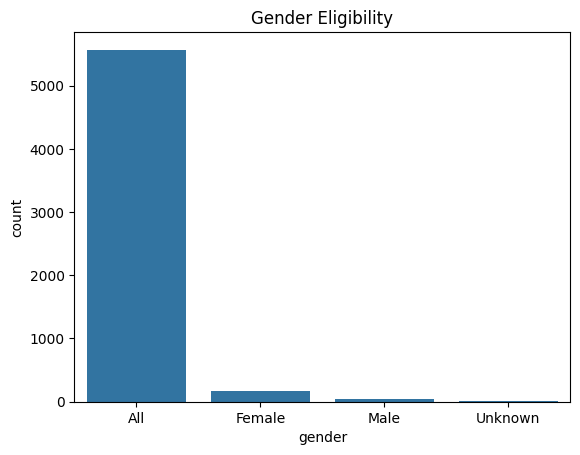

In [ ]:
# Check for age or gender-related columns
df_cleaned.columns[df_cleaned.columns.str.contains('age|gender')]
# Age distribution
if 'minimum_age' in df_cleaned.columns:
    df_cleaned['minimum_age'] = df_cleaned['minimum_age'].str.extract('(\d+)').astype(float)
    sns.histplot(df_cleaned['minimum_age'], bins=20)
    plt.title('Minimum Age Distribution')
    plt.show()

# Gender distribution
if 'gender' in df_cleaned.columns:
    sns.countplot(data=df_cleaned, x='gender')
    plt.title('Gender Eligibility')
    plt.show()


/tmp/ipython-input-27-25199001.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-27-25199001.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



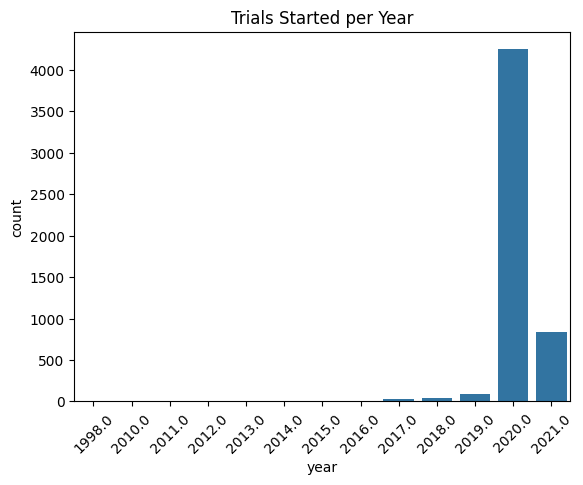

In [ ]:
if 'start_date' in df_cleaned.columns:
    df_cleaned['start_date'] = pd.to_datetime(df_cleaned['start_date'], errors='coerce')
    df_cleaned['year'] = df_cleaned['start_date'].dt.year
    sns.countplot(data=df_cleaned, x='year')
    plt.title('Trials Started per Year')
    plt.xticks(rotation=45)
    plt.show()
